- add wps cpw etc
- retain only vectors
- graph them https://seaborn.pydata.org/tutorial/categorical.html
- add mwt support


In [1]:
import os    # for file io
import glob  # for file io
import codecs # for file io
import re   # regexp
import inspect # for logger
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tag import pos_tag

from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np  # for plotting maybe

import seaborn as sns


In [12]:
def logger(msg,level=False):
    if level:
        print(inspect.stack()[1][3],"(): ",msg,sep="")

WOS:000330288900005	Counter({'positive': 5, 'method': 3, 'cognition': 2, 'bigsix': 1, 'skeptic': 1, 'vague': 1, 'utterance': 1})	['bigsix', 'skeptic', 'vague', 'method', 'utterance', 'cognition', 'positive']	[1, 1, 1, 3, 1, 2, 5]
WOS:000250171400002	Counter({'theory': 6, 'method': 3, 'downtone': 2, 'explorative': 2, 'positive': 2, 'argue': 1, 'tvek': 1, 'compare': 1, 'utterance': 1, 'coherence': 1})	['argue', 'tvek', 'theory', 'downtone', 'explorative', 'positive', 'compare', 'utterance', 'method', 'coherence']	[1, 1, 6, 2, 2, 2, 1, 1, 3, 1]
WOS:000336745500001	Counter({'method': 6, 'cognition': 4, 'positive': 3, 'hedge': 3, 'compare': 2, 'negationpure': 2, 'negation': 2, 'vague': 2, 'argue': 1, 'trulyamplify': 1, 'downtone': 1, 'utterance': 1, 'gradeamplify': 1, 'pronoun': 1, 'skeptic': 1, 'amplify': 1})	['argue', 'trulyamplify', 'downtone', 'utterance', 'positive', 'compare', 'cognition', 'method', 'gradeamplify', 'pronoun', 'skeptic', 'hedge', 'negationpure', 'negation', 'vague', 'a

WOS:000222017500009	Counter({'positive': 2, 'method': 2, 'compare': 1, 'cognition': 1})	['positive', 'compare', 'method', 'cognition']	[2, 1, 2, 1]
WOS:000324156700006	Counter({'cognition': 8, 'theory': 6, 'argue': 3, 'positive': 2, 'utterance': 2, 'coherence': 2})	['argue', 'theory', 'cognition', 'positive', 'utterance', 'coherence']	[3, 6, 8, 2, 2, 2]
WOS:A1996UQ69700003	Counter({'pronoun': 2, 'positive': 2, 'utterance': 2, 'argue': 1, 'timeadv': 1})	['argue', 'timeadv', 'pronoun', 'positive', 'utterance']	[1, 1, 2, 2, 2]
WOS:000240374900002	Counter({'argue': 4, 'utterance': 4, 'positive': 3, 'theory': 2, 'cognition': 2, 'method': 2, 'pronoun': 2, 'tvek': 1, 'skeptic': 1, 'hedge': 1, 'compare': 1, 'vague': 1})	['argue', 'theory', 'tvek', 'positive', 'utterance', 'cognition', 'method', 'pronoun', 'skeptic', 'hedge', 'compare', 'vague']	[4, 2, 1, 3, 4, 2, 2, 2, 1, 1, 1, 1]
WOS:000221032900011	Counter({'positive': 4, 'cognition': 3, 'pronoun': 2, 'skeptic': 1, 'hedge': 1, 'explorative':

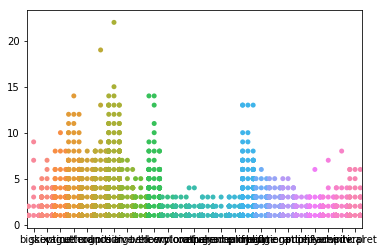

In [34]:
# read resource files
resourcedirectory = "/home/jussi/aktuellt/99.vetenskapstext/resources"
datadirectory = "/home/jussi/aktuellt/99.vetenskapstext/data"

#loglevels
monitor = False
debug = False
error = True

# Iterates through all files in directory, checks each one against a regular expression
def getresources(directory=resourcedirectory):
    global lexresource
    lexresource = {}
    for filename in os.listdir(directory):
        hitlist = re.match('([a-z]+)\.en\.list', filename)
        if hitlist:
            lexres = hitlist.group(1)
            full_filename = os.path.join(directory, filename) 
            logger("Found and read "+lexres,debug)
            lexresource[lexres] = []
            with codecs.open(full_filename, encoding='utf-8') as lexfile:
                lexline = lexfile.readline().rstrip()
                while lexline:
                    lexline
                    lexresource[lexres].append(lexline)
                    lexline=lexfile.readline().rstrip()
                    logger(lexres+"\t"+lexline,debug)

getresources(resourcedirectory)

def runfile(filename,directory=datadirectory):
    global score
    score = {}
    full_filename = os.path.join(directory, filename) 
    i = 0
    with codecs.open(full_filename, encoding='utf-8') as textfile:
        inline = textfile.readline().rstrip()
        while inline and i < 1000: 
            textline = inline.split("\t")
            try:
                text = word_tokenize(textline[0]) # might want to do sent_tokenize as well
                tags = pos_tag(text)
                id = textline[1]
                cnt = Counter()
                logger(id+"\t"+textline[0],debug)
                i += 1
            except IndexError:
                logger("bad line: "+inline,error)
            for w in text:
                for l in lexresource:
                    if l == "stoplist":
                        continue
                    if w in lexresource[l]:
                        logger(l+"\t"+w,debug)
                        cnt[l] += 1
            score[id] = cnt
            inline = textfile.readline().rstrip()
    plotem()
            
def plotem():
    values = []
    cats = []
    ids = []
    for id in score:
        values += score[id].values()
        cats += score[id]
        ids += [id]*len(score[id])
        #
        print(id,score[id],list(score[id]),list(score[id].values()),sep="\t")
    %matplotlib inline
    g=sns.swarmplot(x=cats, y=values) #, hue=ids);    

runfile("loveUTF82k.txt")

